> # Exercise

In [64]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

(device(type='cuda', index=0), 80, 80, 20, 20)

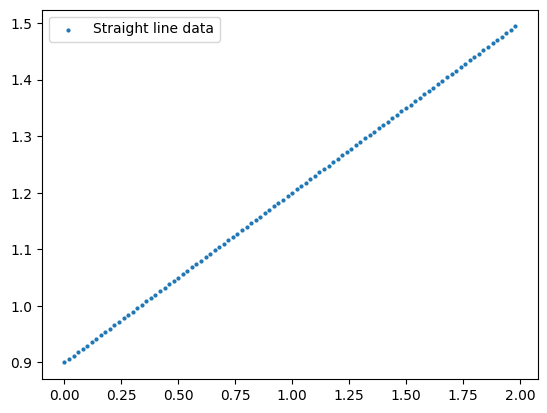

In [51]:
# 1. Create a straight line dataset using the linear regression formula (weight * X + bias)

# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total

weight = 0.3
bias = 0.9

X = torch.arange(0, 2, 0.02, device=device).unsqueeze(dim=1)
y = weight * X + bias

# Split the data into 80% training, 20% testing

train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

plt.scatter(X.cpu(), y.cpu(), label="Straight line data", s=4)
plt.legend()

# Plot the training and testing data so it becomes visual

X_train.device, len(X_train), len(y_train), len(X_test), len(y_test)

In [52]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    
    """
    Plots the training, test and predictions
    """

    plt.scatter(train_data, train_label, c='r', s=4, label="Training data")

    plt.scatter(test_data, test_label, c='b', s=4, label="Testing data")

    if predictions is not None :

        plt.scatter(test_data, predictions, c='black', s=4, label="Predictions")

    plt.legend(prop={"size" : 14})

In [53]:
# 2. Build a PyTorch model by subclassing nn.Module.

class ExerciseModel(nn.Module):

# Inside should be a randomly initialized nn.Parameter() 
# with requires_grad=True, one for weights and one for bias.


    def __init__(self):
        super().__init__()

        # method 1

        # self.weight = nn.Parameter(torch.randn(1,
        #                                        dtype=torch.float),
        #                                        requires_grad=True)
        
        # self.bias = nn.Parameter(torch.randn(1,
        #                                     dtype=torch.float),
        #                                     requires_grad=True)
        
        # method 2

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

# mplement the forward() method to compute the linear regression function 
# you used to create the dataset in 1.

    def forward(self, x:torch.tensor) -> torch.tensor:

        return self.linear_layer(x)
    
# Once you've constructed the model, make an instance of it and check its state_dict().

torch.manual_seed(42)

exercise_model = ExerciseModel()
exercise_model.to(device)
exercise_model.state_dict(), next(exercise_model.parameters()).device

(OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]),
 device(type='cuda', index=0))

In [58]:
# 3. Create a loss function and optimizer using nn.L1Loss() and 
# torch.optim.SGD(params, lr) respectively.


loss_fn = nn.L1Loss()


# Set the learning rate of the optimizer to be 0.01 and 
# the parameters to optimize should be the model parameters from the model you created in 2.

optimizer = torch.optim.SGD(exercise_model.parameters(),
                            lr=0.001)


# Write a training loop to perform the appropriate training steps for 300 epochs.

def Fit(epochs):

    train_loss_values = []
    test_loss_values = []
    epoch_count = []


    for epoch in range(epochs):

        exercise_model.train()

        train_pred = exercise_model(X_train)

        train_loss = loss_fn(train_pred, y_train)

        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()
        

        ## testing

        exercise_model.eval()

        with torch.inference_mode():

            test_pred = exercise_model(X_test)
            test_loss = loss_fn(test_pred, y_test)

# The training loop should test the model on the test dataset every 20 epochs.

            if epoch % 20 == 0:

                train_loss_values.append(train_loss)
                test_loss_values.append(test_loss)
                epoch_count.append(epoch)
                print(f"Epochs: {epoch} ----- | MAE Train Loss: {train_loss} ----- | MAE Test Loss: {test_loss}")

    return epoch_count, train_loss_values, test_loss_values            

In [59]:
epoch_count, train_loss_values, test_loss_values = Fit(350)

Epochs: 0 ----- | MAE Train Loss: 0.0046457103453576565 ----- | MAE Test Loss: 0.002108115004375577
Epochs: 20 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 40 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 60 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 80 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 100 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 120 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 140 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 160 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE Test Loss: 0.0024294795002788305
Epochs: 180 ----- | MAE Train Loss: 0.00015709921717643738 ----- | MAE T

In [62]:
exercise_model.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.3002]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8997], device='cuda:0'))]),
 0.3,
 0.9)

tensor([[1.3800],
        [1.3860],
        [1.3920],
        [1.3980],
        [1.4040],
        [1.4100],
        [1.4160],
        [1.4220],
        [1.4280],
        [1.4340],
        [1.4400],
        [1.4460],
        [1.4520],
        [1.4580],
        [1.4640],
        [1.4700],
        [1.4760],
        [1.4820],
        [1.4880],
        [1.4940]], device='cuda:0', grad_fn=<AddmmBackward0>)


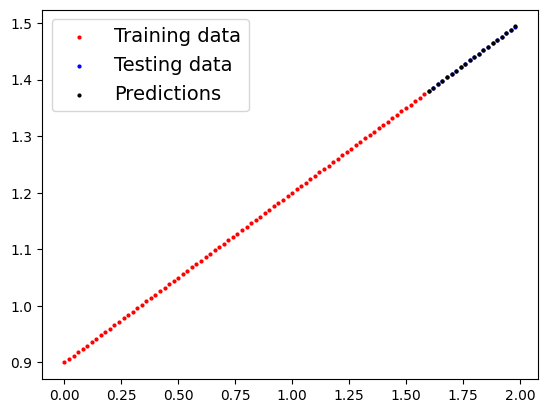

In [63]:
# 4. Make predictions with the trained model on the test data.

y_pred = exercise_model(X_test)
print(y_pred)

# Visualize these predictions against the original training and testing data 
# (note: you may need to make sure the predictions are not on the GPU 
# if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

plot_predictions(train_data=X_train.cpu(),
                 train_label=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_label=y_test.cpu(),
                 predictions=y_pred.detach().cpu())

In [65]:
# 5. Save your trained model's state_dict() to file

# Create folder
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create path for model
MODEL_NAME = "03_linear_regression_exercise"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model
print(f"Saving model: {MODEL_SAVE_PATH}")
torch.save(obj=exercise_model.state_dict(),
           f=MODEL_SAVE_PATH)

# Create a new instance of your model class you made in 2. and load in the state_dict() 
# you just saved to it.



Saving model: models\03_linear_regression_exercise


In [67]:
# 6. Perform predictions on your test data with the loaded model and 
# confirm they match the original model predictions from 4.

loaded_exercise_model = ExerciseModel()
loaded_exercise_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [72]:
loaded_exercise_model.to(device)
loaded_exercise_model_pred = loaded_exercise_model(X_test)
loaded_exercise_model_pred == y_pred


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')